In [12]:
from utils import Banco
from dotenv import load_dotenv
import os

load_dotenv()

banco = Banco(
    database=os.getenv('DATABASE'),
    host=os.getenv('HOST'),
    user=os.getenv('USER'),
    password=os.getenv('PASSWORD')
)

In [13]:
with open('querys/dados.sql', 'r') as file:
    query = file.read()

df = banco.get_table(query, ano=2024, id_modulo=[58,322], analito=['Glicose'])
df


,part,id_modulo,analito,envio_str,envio,item_ensaio,sistema,valor
0,6235,322,Glicose,Dez/2023,2023-12-01,GB01,1,NaN
1,16615,322,Glicose,Jun/2024,2024-06-01,GB01,1,198.0
2,16615,322,Glicose,Jun/2024,2024-06-01,GB02,1,48.0
3,16615,322,Glicose,Jun/2024,2024-06-01,GB03,1,93.0
4,16637,322,Glicose,Jun/2024,2024-06-01,GB01,1,195.0
...,...,...,...,...,...,...,...,...
32164,16622,58,Glicose,Jul/2024,2024-07-01,BQ03,1,82.0
32165,16634,58,Glicose,Jul/2024,2024-07-01,BQ02,1,114.0
32166,16673,58,Glicose,Jul/2024,2024-07-01,BQ03,1,99.0
32167,16713,58,Glicose,Jul/2024,2024-07-01,BQ02,1,101.0


In [3]:
from tratamento import PreProcessamento

prepross = PreProcessamento(df)
df_tratado = prepross.get_data().set_index(['part','id_modulo','analito','sistema'])
df_tratado

item                             A24R1I1  A24R1I2  A24R1I3  A24R2I1  A24R2I2  \
part  id_modulo analito sistema                                                
15    58        Glicose 1          129.0     96.0    171.0    265.0    271.0   
28    58        Glicose 1          136.0     95.0    188.0    277.0    289.0   
                        2          130.0     96.0    190.0    292.0    306.0   
34    58        Glicose 1          137.0     98.0    190.0    275.0    288.0   
36    58        Glicose 1          147.0    102.0    210.0    296.0    313.0   
...                                  ...      ...      ...      ...      ...   
16452 58        Glicose 1            NaN      NaN      NaN    260.0    280.0   
16453 58        Glicose 1            NaN      NaN      NaN    250.0    260.0   
16455 58        Glicose 1            NaN      NaN      NaN    264.0    283.0   
16457 58        Glicose 1            NaN      NaN      NaN    266.0    292.0   
16461 58        Glicose 1            NaN      NaN      NaN    154.0    260.0   

item                             A24R2I3  A24R3I1  A24R3I2  A24R3I3  A24R4I1  \
part  id_modulo analito sistema                                                
15    58        Glicose 1           90.0     83.0    281.0    181.0    275.0   
28    58        Glicose 1           96.0     95.0    292.0    190.0    288.0   
                        2           99.0     93.0    284.0    196.0    282.0   
34    58        Glicose 1           93.0     95.0    286.0    191.0    288.0   
36    58        Glicose 1          103.0    103.0    309.0    209.0    310.0   
...                                  ...      ...      ...      ...      ...   
16452 58        Glicose 1           93.0     92.0    275.0    187.0    236.0   
16453 58        Glicose 1           90.0     84.0    257.0    231.0    300.0   
16455 58        Glicose 1           84.0     97.0    287.0    199.0    303.0   
16457 58        Glicose 1           92.0    107.0    371.0    225.0    229.0   
16461 58        Glicose 1           92.0     80.0    277.0    230.0    292.0   

item                             A24R4I2  A24R4I3  
part  id_modulo analito sistema                    
15    58        Glicose 1           92.0     85.0  
28    58        Glicose 1           93.0     94.0  
                        2           91.0     93.0  
34    58        Glicose 1           93.0     98.0  
36    58        Glicose 1          102.0    103.0  
...                                  ...      ...  
16452 58        Glicose 1           79.0     80.0  
16453 58        Glicose 1           95.0    181.0  
16455 58        Glicose 1          103.0    106.0  
16457 58        Glicose 1           75.0     77.0  
16461 58        Glicose 1           89.0    100.0  

[2325 rows x 12 columns]

In [4]:
import pandas as pd
def cola_identica(df: pd.DataFrame) -> pd.DataFrame:
    df = df.reset_index()
    df = df[df.drop('part', axis=1).duplicated(keep=False)]

    df = df.copy()
    df['part'] = df['part'].astype(str)

    agregar = [i for i in df.columns if i not in ['part','sistema']]
    return df.groupby(agregar, dropna=False)['part'].agg(lambda x: ' - '.join((x))).reset_index()

len(cola_identica(df_tratado))

11

In [11]:
from utils import Cola

cola = Cola(df_tratado)

cola.aplicar_modelo(eps=0.06).get('df')

# Cola().cola_identica(df_tratado)

,,,item,A24R1I1,A24R1I2,A24R1I3,A24R2I1,A24R2I2,A24R2I3,A24R3I1,A24R3I2,A24R3I3,A24R4I1,A24R4I2,A24R4I3,cluster
part,id_modulo,analito,sistema,,,,,,,,,,,,,
235,58,Glicose,1,144.0,101.0,209.0,291.0,288.0,95.0,101.0,308.0,192.0,280.0,94.0,94.0,0
5756,58,Glicose,1,144.0,101.0,209.0,291.0,288.0,95.0,101.0,308.0,192.0,280.0,94.0,94.0,0
751,58,Glicose,1,134.0,95.0,185.0,268.0,278.0,93.0,91.0,279.0,182.0,282.0,92.0,98.0,1
244,58,Glicose,1,139.0,100.0,195.0,268.0,278.0,92.0,90.0,278.0,182.0,282.0,92.0,97.0,1
359,58,Glicose,1,142.0,99.0,199.0,274.0,284.0,94.0,99.0,296.0,199.0,289.0,95.0,99.0,2
13392,58,Glicose,2,133.0,96.0,191.0,275.0,285.0,94.0,99.0,295.0,201.0,286.0,95.0,96.0,2
11159,58,Glicose,1,133.0,97.0,166.0,272.0,281.0,94.0,94.0,280.0,183.0,282.0,94.0,98.0,3
530,58,Glicose,1,131.0,97.0,184.0,271.0,280.0,93.0,94.0,279.0,186.0,282.0,94.0,99.0,3
904,58,Glicose,1,144.0,98.0,192.0,264.0,271.0,85.0,102.0,299.0,200.0,294.0,90.0,98.0,4


,,,item,A24R1I1,A24R1I2,A24R1I3,A24R2I1,A24R2I2,A24R2I3,A24R3I1,A24R3I2,A24R3I3,A24R4I1,A24R4I2,A24R4I3,cluster
part,id_modulo,analito,sistema,,,,,,,,,,,,,
235,58,Colesterol Total,1,97.0,87.0,103.0,114.0,115.0,92.0,99.0,148.0,108.0,119.0,90.0,79.0,0
5756,58,Colesterol Total,1,97.0,87.0,103.0,114.0,115.0,92.0,99.0,148.0,108.0,119.0,90.0,79.0,0
904,58,Colesterol Total,1,99.0,85.0,100.0,109.0,126.0,94.0,92.0,132.0,110.0,119.0,82.0,81.0,1
553,58,Colesterol Total,1,99.0,85.0,100.0,109.0,126.0,94.0,92.0,132.0,110.0,119.0,82.0,81.0,1
806,58,Colesterol Total,1,97.0,84.0,100.0,122.0,135.0,106.0,90.0,126.0,109.0,142.0,107.0,94.0,2
591,58,Colesterol Total,1,97.0,84.0,100.0,122.0,135.0,106.0,90.0,126.0,109.0,142.0,107.0,94.0,2
1881,58,Colesterol Total,1,98.0,86.0,97.0,112.0,121.0,88.0,89.0,132.0,108.0,124.0,100.0,84.0,3
818,58,Colesterol Total,1,98.0,86.0,97.0,112.0,121.0,88.0,89.0,132.0,108.0,124.0,100.0,84.0,3
1961,58,Colesterol Total,1,106.0,91.0,107.0,106.0,123.0,93.0,97.0,126.0,106.0,113.0,87.0,75.0,4


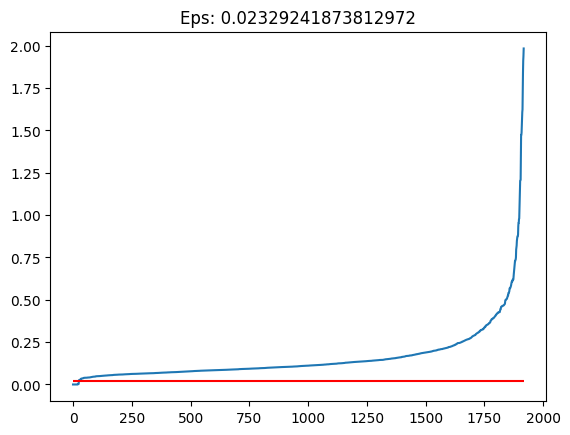

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


def get_eps(dados: np.ndarray, min_samples: int):
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(dados)
    distances, _ = neighbors_fit.kneighbors(dados)

    distances = np.mean(distances[:,1:], axis=1)
    distances = np.sort(distances)
    distances = distances[np.where(distances <= 2)]
    slopes = np.diff(distances)
    value = slopes[np.where(slopes>=1/100)][0]

    index = np.argmax(slopes==value)

    eps = distances[index+1]

    plt.plot(distances)
    plt.hlines(y=eps, xmin=0, xmax=len(distances), colors='red')
    plt.title(f'Eps: {eps}')

    return eps


def apply_model(df: pd.DataFrame, eps=0.06) -> pd.DataFrame:
    # Preenchendo vazios pela média da linha
    imputer = SimpleImputer(strategy="mean")
    dados: np.ndarray = imputer.fit_transform(df.T).T
    
    # Aplicando a normalização
    norm = StandardScaler()
    dados = norm.fit_transform(dados)
    
    # dados = df_model.flatten()
    # q1 = np.percentile(dados, 25)
    # q3 = np.percentile(dados, 75)

    # Aplicando o modelo DBSCAN
    min_samples = 2
    eps = get_eps(dados, min_samples)
    
    model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(dados)
    # return model

    df['cluster'] = model.labels_
    return df.query('cluster != -1').sort_values('cluster')


apply_model(df_tratado)#.reset_index().value_counts('cluster')



In [236]:
def get_eps(dados: np.ndarray):
    neighbors = NearestNeighbors(n_neighbors=2)
    neighbors_fit = neighbors.fit(dados)
    distances, indices = neighbors_fit.kneighbors(dados)

    distances = np.mean(distances[:,1:],axis=1)
    distances = np.sort(distances)
    distances = distances[np.where((0.2 <= distances) & (distances <= 2))]
    slopes = np.diff(distances)
    value = slopes[np.where(slopes>=1/100)][0]

    index = np.argmax(slopes==value)

    eps = distances[index+1]

    return eps

get_eps(dados)

np.float64(0.7542229749381794)

Text(0.5, 1.0, 'Eps: 0.7542229749381794')

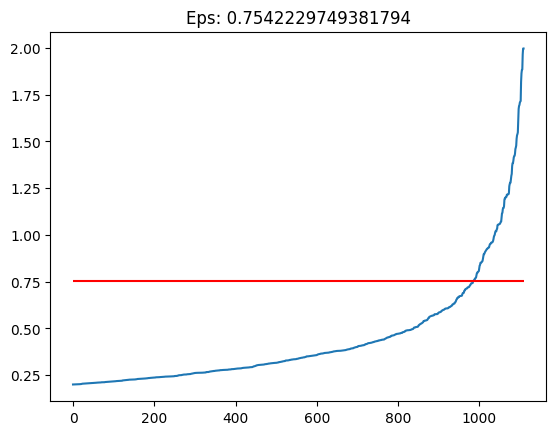

In [233]:
plt.plot(distances)
plt.hlines(y=eps, xmin=0, xmax=len(distances), colors='red')
plt.title(f'Eps: {eps}')